In [3]:
!pip install Pillow

from google.colab import files
from PIL import Image
import io

# Upload the image file
uploaded = files.upload()

# Get the file name from the uploaded dictionary
filename = list(uploaded.keys())[0]
print(f"Uploaded file: {filename}")  # print file name to ensure correct file was uploaded.

Saving input.png.JPG to input.png.JPG
Uploaded file: input.png.JPG


In [7]:
!pip install Pillow

from PIL import Image
import io
# Open the uploaded image using the file data (bytes) and the io module.
try:
    img = Image.open(io.BytesIO(uploaded[filename]))
except Exception as e:
    print(f"Error opening image: {e}")
    raise

def encode_image(img, msg):
    width, height = img.size
    (x, y) = (0, 0)

    # Encode message length first
    length = len(msg)
    for i in range(16): # We will use 2 bytes to store the length
        bit = (length >> (15 - i)) & 1

        if x == width:
            x = 0
            y += 1

        img.putpixel((x, y), (img.getpixel((x, y))[0] & ~1 | bit))
        x += 1

    # Encode the message
    for char in msg:
        val = ord(char)

        for i in range(8):
            bit = (val >> (7 - i)) & 1

            if x == width:
                x = 0
                y += 1

            img.putpixel((x, y), (img.getpixel((x, y))[0] & ~1 | bit))
            x += 1

    return img

def decode_image(img):
    width, height = img.size
    (x, y) = (0, 0)
    msg = ""

    # Decode message length first
    length = 0
    for i in range(16):
      if x == width:
          x = 0
          y += 1

      length = (length << 1) | (img.getpixel((x, y))[0] & 1)
      x += 1

    # Decode the message
    for _ in range(length):
      val = 0

      for i in range(8):
        if x == width:
            x = 0
            y += 1

        val = (val << 1) | (img.getpixel((x, y))[0] & 1)
        x += 1

      msg += chr(val)

    return msg


# Example usage
msg = "This is a secret message!"
encoded_img = encode_image(img, msg)
encoded_img.save("encoded.png")

decoded_img = Image.open("encoded.png")
decoded_msg = decode_image(decoded_img)
print(decoded_msg)

This is a secret message!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

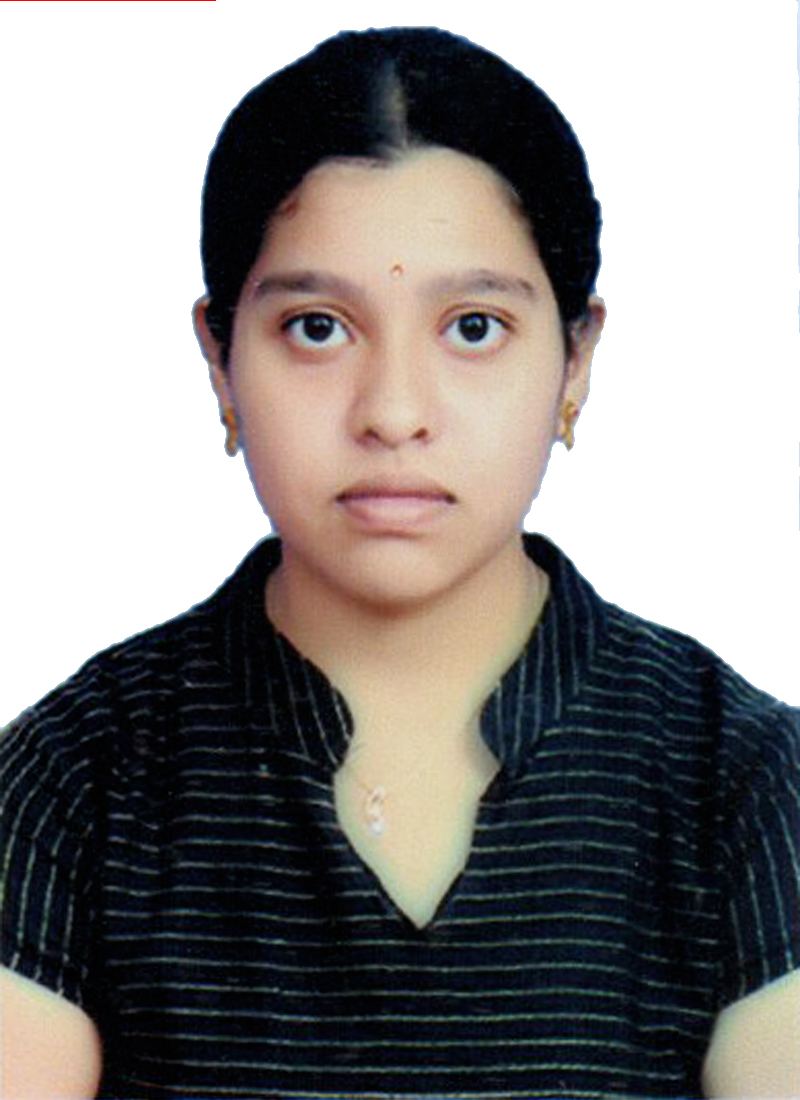

This is a secret message!


In [8]:
!pip install Pillow

from PIL import Image
import io
from IPython.display import display
from google.colab import files

# Open the uploaded image using the file data (bytes) and the io module.
try:
    img = Image.open(io.BytesIO(uploaded[filename]))
except Exception as e:
    print(f"Error opening image: {e}")
    raise

def encode_image(img, msg):
    width, height = img.size
    (x, y) = (0, 0)

    # Encode message length first
    length = len(msg)
    for i in range(16): # We will use 2 bytes to store the length
        bit = (length >> (15 - i)) & 1

        if x == width:
            x = 0
            y += 1

        img.putpixel((x, y), (img.getpixel((x, y))[0] & ~1 | bit))
        x += 1

    # Encode the message
    for char in msg:
        val = ord(char)

        for i in range(8):
            bit = (val >> (7 - i)) & 1

            if x == width:
                x = 0
                y += 1

            img.putpixel((x, y), (img.getpixel((x, y))[0] & ~1 | bit))
            x += 1

    return img

def decode_image(img):
    width, height = img.size
    (x, y) = (0, 0)
    msg = ""

    # Decode message length first
    length = 0
    for i in range(16):
      if x == width:
          x = 0
          y += 1

      length = (length << 1) | (img.getpixel((x, y))[0] & 1)
      x += 1

    # Decode the message
    for _ in range(length):
      val = 0

      for i in range(8):
        if x == width:
            x = 0
            y += 1

        val = (val << 1) | (img.getpixel((x, y))[0] & 1)
        x += 1

      msg += chr(val)

    return msg


# Example usage
msg = "This is a secret message!"
encoded_img = encode_image(img, msg)

# Save the image to a file, then download
encoded_img.save("encoded.png")
files.download("encoded.png")

#Display the encrypted image
display(encoded_img)

#Decoded the image
decoded_img = Image.open("encoded.png")
decoded_msg = decode_image(decoded_img)
print(decoded_msg)